**Understanding industry classifications**

1. we must first understand what industry classification is best to use and the nuances between each one.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set paths here C:\Users\clint\Desktop\compstak-ra\src\exploration_1.ipynb
#C:\Users\clint\Desktop\compstak-ra\data\data\university-of-british-columbia-leases-2025-04-02.csv
#C:\Users\clint\Desktop\compstak-ra\data\data\university-of-british-columbia-sales-2025-04-02.csv
#C:\Users\clint\Desktop\compstak-ra\data\data\cb_2018_us_state_5m\cb_2018_us_state_5m.shp
path = 'C:/Users/clint/Desktop/data/data/'
path_census = 'C:/Users/clint/Desktop/data/cb_2018_us_state_5m/'

# Load the data
sales = pd.read_csv(path + 'university-of-british-columbia-sales-2025-04-02.csv')
leases = pd.read_csv(path + 'university-of-british-columbia-leases-2025-04-02.csv')

C:\Users\clint\AppData\Local\Temp\ipykernel_14764\2022255339.py:11: DtypeWarning: Columns (8,52,73,77) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv(path + 'university-of-british-columbia-sales-2025-04-02.csv')
C:\Users\clint\AppData\Local\Temp\ipykernel_14764\2022255339.py:12: DtypeWarning: Columns (15,35,37,59,61,67,71,73,76,77,78,80,82,85) have mixed types. Specify dtype option on import or set low_memory=False.
  leases = pd.read_csv(path + 'university-of-british-columbia-leases-2025-04-02.csv')
C:\Users\clint\AppData\Local\Temp\ipykernel_14764\2022255339.py:12: DtypeWarning: Columns (15,35,37,59,61,67,71,73,76,77,78,80,82,85) have mixed types. Specify dtype option on import or set low_memory=False.
  leases = pd.read_csv(path + 'university-of-british-columbia-leases-2025-04-02.csv')


In [23]:
# Get unique property types in each dataset
leases_prop_types = leases['Property Type'].unique()
sales_prop_types = sales['Property Type'].unique()
leases_prop_subtypes = leases['Property Subtype'].unique()
sales_prop_subtypes = sales['Property Subtype'].unique()

print("Leases Property Types:")
print(leases_prop_types)

print("\nSales Property Types:")
print(sales_prop_types)

Leases Property Types:
['Office' 'Land' 'Multi-Family' 'Retail' 'Mixed-Use' 'Hotel' 'Other'
 'Industrial' nan]

Sales Property Types:
['Office' 'Land' nan 'Multi-Family' 'Industrial' 'Retail' 'Other' 'Hotel'
 'Mixed-Use']


In [24]:
# Analyzing unique buildings in the sales dataset

# Count unique Property IDs in the sales dataframe
unique_buildings_sales = sales['Property Id'].nunique()
total_sales_records = len(sales)

print(f"Number of unique buildings (Property IDs) in sales data: {unique_buildings_sales}")
print(f"Total number of sales records: {total_sales_records}")
print(f"Ratio of unique buildings to total records: {unique_buildings_sales / total_sales_records:.4f}")

# Check for duplicate Property IDs - buildings with multiple sales records
property_id_counts = sales['Property Id'].value_counts()
buildings_with_multiple_sales = (property_id_counts > 1).sum()
max_sales_per_building = property_id_counts.max()

print(f"\nNumber of buildings with multiple sales records: {buildings_with_multiple_sales}")
print(f"Maximum number of sales records for a single building: {max_sales_per_building}")

Number of unique buildings (Property IDs) in sales data: 500230
Total number of sales records: 563653
Ratio of unique buildings to total records: 0.8875

Number of buildings with multiple sales records: 52928
Maximum number of sales records for a single building: 53


In [25]:
# Compare with leases dataset
unique_buildings_leases = leases['Property Id'].nunique()
total_leases_records = len(leases)

print(f"Number of unique buildings (Property IDs) in leases data: {unique_buildings_leases}")
print(f"Total number of lease records: {total_leases_records}")
print(f"Ratio of unique buildings to total records: {unique_buildings_leases / total_leases_records:.4f}")

# Buildings that appear in both datasets
buildings_in_sales = set(sales['Property Id'].unique())
buildings_in_leases = set(leases['Property Id'].unique())
buildings_in_both = buildings_in_sales.intersection(buildings_in_leases)

print(f"\nNumber of buildings that appear in both sales and leases datasets: {len(buildings_in_both)}")
print(f"Percentage of sales buildings also in leases: {len(buildings_in_both)/len(buildings_in_sales):.2%}")
print(f"Percentage of leases buildings also in sales: {len(buildings_in_both)/len(buildings_in_leases):.2%}")

Number of unique buildings (Property IDs) in leases data: 333701
Total number of lease records: 1168997
Ratio of unique buildings to total records: 0.2855

Total number of lease records: 1168997
Ratio of unique buildings to total records: 0.2855

Number of buildings that appear in both sales and leases datasets: 74308
Percentage of sales buildings also in leases: 14.85%
Percentage of leases buildings also in sales: 22.27%

Number of buildings that appear in both sales and leases datasets: 74308
Percentage of sales buildings also in leases: 14.85%
Percentage of leases buildings also in sales: 22.27%


Total unique buildings in our dataset: 759,623
Total buildings in the United States: 152,900,000
Our dataset represents 0.496810% of all US buildings


C:\Users\clint\AppData\Local\Temp\ipykernel_14764\1764178999.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


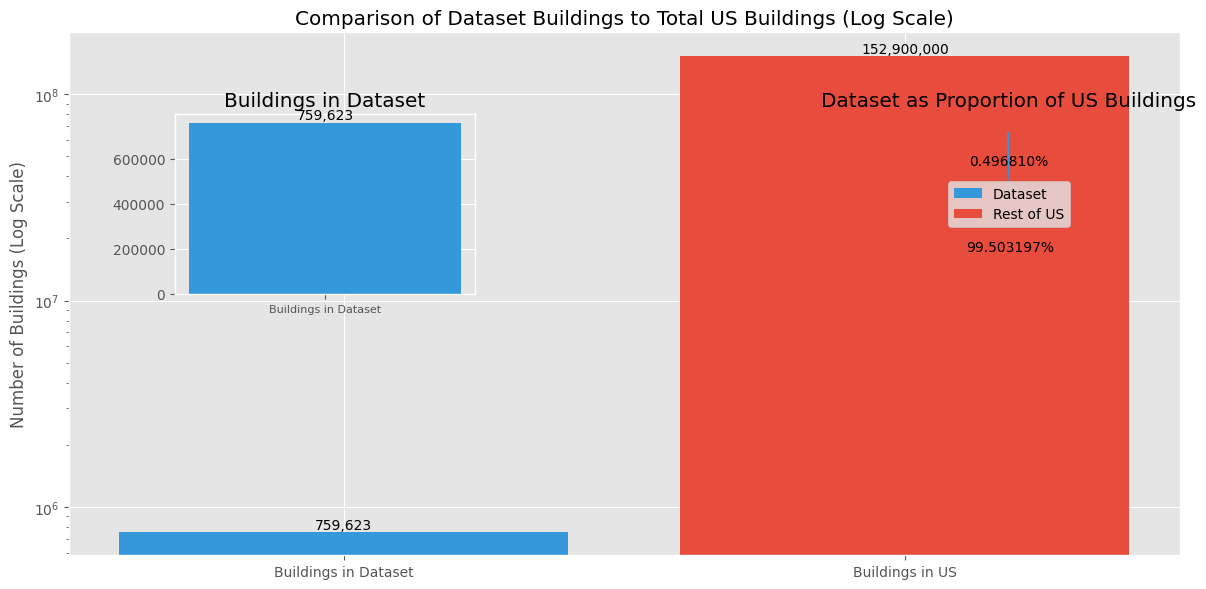

In [26]:
# Calculate total unique buildings in our dataset (no duplicates)
total_unique_buildings = len(set(sales['Property Id']).union(set(leases['Property Id'])))
us_buildings_total = 152.9e6  # 152.9 million buildings in the US

# Print the results
print(f"Total unique buildings in our dataset: {total_unique_buildings:,}")
print(f"Total buildings in the United States: {us_buildings_total:,.0f}")
print(f"Our dataset represents {total_unique_buildings / us_buildings_total:.6%} of all US buildings")

# Create the visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Create bar chart with log scale for better visualization
data = [total_unique_buildings, us_buildings_total]
labels = ['Buildings in Dataset', 'Buildings in US']

# Main plot with regular scale
bars = ax.bar(labels, data, color=['#3498db', '#e74c3c'])
ax.set_yscale('log')  # Use log scale to show the vast difference
ax.set_ylabel('Number of Buildings (Log Scale)')
ax.set_title('Comparison of Dataset Buildings to Total US Buildings (Log Scale)')

# Add annotations on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,.0f}',
            ha='center', va='bottom', rotation=0)

# Add inset with regular scale showing just the dataset
axins = fig.add_axes([0.15, 0.5, 0.25, 0.3])
axins.bar(labels[0], data[0], color='#3498db')
axins.set_title('Buildings in Dataset')
axins.text(0, data[0]*1.02, f'{data[0]:,.0f}', ha='center')
axins.tick_params(axis='x', labelsize=8)
axins.set_xticks([0])
axins.set_xticklabels([labels[0]])

# Add a pie chart showing the proportion
ax2 = fig.add_axes([0.72, 0.5, 0.25, 0.3])
sizes = [total_unique_buildings, us_buildings_total - total_unique_buildings]
labels_pie = ['Dataset', 'Rest of US']
colors = ['#3498db', '#e74c3c']
ax2.pie(sizes, labels=None, autopct=lambda p: f'{p:.6f}%' if p > 0.0001 else '', 
       startangle=90, colors=colors)
ax2.set_title('Dataset as Proportion of US Buildings')

# Create legend
ax2.legend(labels=labels_pie, loc='center')

plt.tight_layout()
plt.show()

Total unique buildings in our dataset: 759,623
Total buildings in the United States: 152,900,000
Our dataset represents 0.49681033% of all US buildings


C:\Users\clint\AppData\Local\Temp\ipykernel_14764\30830748.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


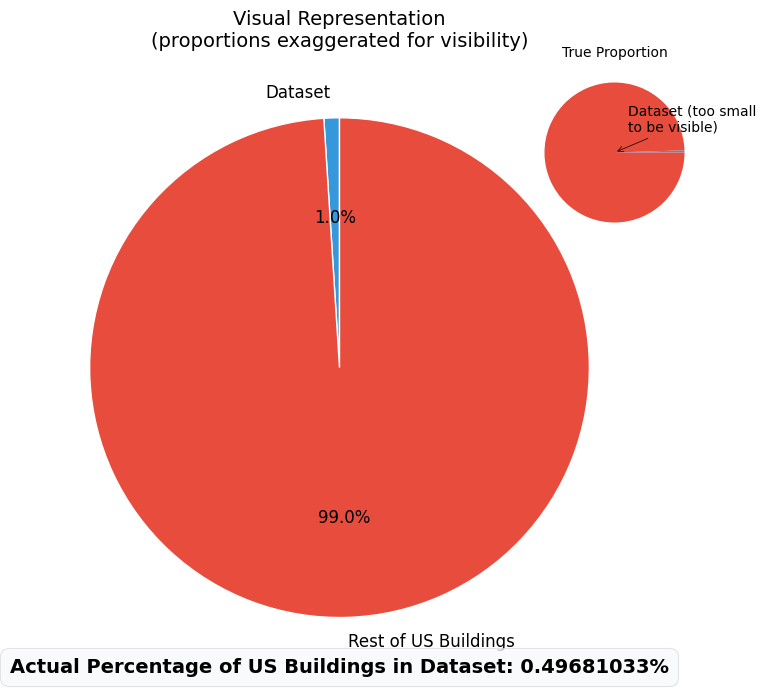

In [29]:
# Create a dedicated pie chart showing the percentage representation
total_unique_buildings = len(set(sales['Property Id']).union(set(leases['Property Id'])))
us_buildings_total = 152.9e6  # 152.9 million buildings in the US
dataset_percentage = (total_unique_buildings / us_buildings_total) * 100

# Print precise values
print(f"Total unique buildings in our dataset: {total_unique_buildings:,}")
print(f"Total buildings in the United States: {us_buildings_total:,.0f}")
print(f"Our dataset represents {dataset_percentage:.8f}% of all US buildings")

# Create a cleaner pie chart focused on percentage
fig, ax = plt.subplots(figsize=(10, 7))

# Data for pie chart (not showing actual proportions as they would be invisible)
# Instead we'll use a visual representation that shows the concept while making the
# small slice visible
labels = ['Dataset', 'Rest of US Buildings']
colors = ['#3498db', '#e74c3c']

# Create two visualizations
# 1. A "visual" pie chart that exaggerates the small slice to make it visible
visual_sizes = [1, 99]  # Visual representation (not to scale)
ax.pie(visual_sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
       wedgeprops={'edgecolor': 'w', 'linewidth': 1}, textprops={'fontsize': 12})
ax.set_title('Visual Representation\n(proportions exaggerated for visibility)', fontsize=14)

# Add an annotation with the actual percentage
ax.text(0, -1.2, f'Actual Percentage of US Buildings in Dataset: {dataset_percentage:.8f}%', 
        ha='center', va='center', fontsize=14, fontweight='bold',
        bbox={'facecolor': '#f8f9fa', 'alpha': 0.8, 'boxstyle': 'round,pad=0.5', 'edgecolor': '#cccccc'})

# Add a small inset showing the true proportion (will look almost like a full circle)
axins = fig.add_axes([0.65, 0.65, 0.25, 0.25])
true_sizes = [total_unique_buildings, us_buildings_total - total_unique_buildings]
axins.pie(true_sizes, colors=colors)
axins.set_title('True Proportion', fontsize=10)

# Add a text label pointing to the tiny slice
axins.annotate('Dataset (too small\nto be visible)',
            xy=(0, 0), xytext=(0.2, 0.3),
            arrowprops=dict(arrowstyle="->", color='black'))

plt.tight_layout()
plt.show()

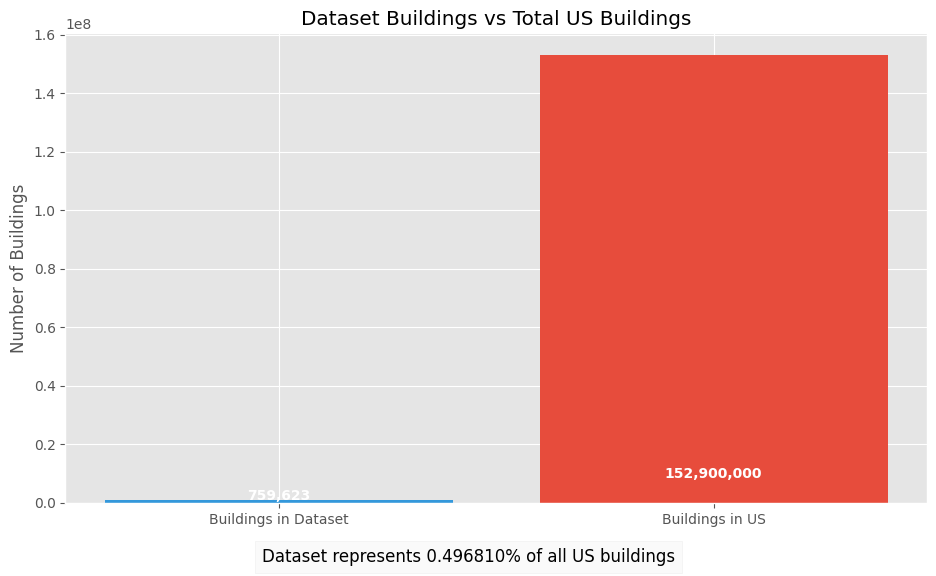

In [28]:
import numpy as np
# Alternative visualization - simpler representation
fig, ax = plt.subplots(figsize=(10, 6))

# Create the main bar chart
x = np.arange(2)
bars = ax.bar(x, [total_unique_buildings, us_buildings_total], color=['#3498db', '#e74c3c'])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Buildings')
ax.set_title('Dataset Buildings vs Total US Buildings')

# Scientific notation for large values
ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Add text labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    formatted_height = f'{height:,.0f}'
    y_pos = 0.05 * height  # Position label at 5% of bar height
    
    ax.text(bar.get_x() + bar.get_width()/2., y_pos,
            formatted_height,
            ha='center', va='bottom',
            color='white', fontweight='bold')

# Text showing the percentage
percentage = total_unique_buildings / us_buildings_total * 100
plt.figtext(0.5, 0.01, f'Dataset represents {percentage:.6f}% of all US buildings', 
             ha='center', fontsize=12, bbox={'facecolor':'#f9f9f9', 'alpha':0.8, 'pad':5})

plt.tight_layout(pad=3)
plt.show()

In [30]:
# Categorize properties into housing units and commercial buildings
# US building statistics: 152.9M total buildings, with 147M housing units and 5.9M commercial buildings

# First, let's get all unique properties from both sales and leases datasets
all_buildings = set(sales['Property Id']).union(set(leases['Property Id']))
total_unique_buildings = len(all_buildings)

# Create a combined dataframe with just Property IDs and Property Types
sales_props = sales[['Property Id', 'Property Type']].dropna(subset=['Property Type']).drop_duplicates()
leases_props = leases[['Property Id', 'Property Type']].dropna(subset=['Property Type']).drop_duplicates()

# Combine the two dataframes
all_props = pd.concat([sales_props, leases_props]).drop_duplicates(subset=['Property Id'])

# Count the number of unique properties by type
print(f"Total unique properties with known type: {len(all_props)}")
print("\nProperty type distribution in our dataset:")
print(all_props['Property Type'].value_counts())

# Categorize properties as housing or commercial
all_props['Category'] = all_props['Property Type'].apply(
    lambda x: 'Housing' if x == 'Multi-Family' 
    else 'Commercial' if x in ['Office', 'Retail', 'Mixed-Use', 'Hotel', 'Industrial'] 
    else 'Other'
)

# Count the number of properties in each category
category_counts = all_props['Category'].value_counts()
print("\nCategorized property counts in our dataset:")
print(category_counts)

# Calculate percentages within our dataset
dataset_housing_pct = category_counts.get('Housing', 0) / len(all_props) * 100
dataset_commercial_pct = category_counts.get('Commercial', 0) / len(all_props) * 100
dataset_other_pct = category_counts.get('Other', 0) / len(all_props) * 100

print(f"\nHousing: {dataset_housing_pct:.2f}%")
print(f"Commercial: {dataset_commercial_pct:.2f}%")
print(f"Other: {dataset_other_pct:.2f}%")

# National statistics
us_total_buildings = 152.9e6
us_housing_units = 147e6
us_commercial_buildings = 5.9e6

# Calculate US percentages
us_housing_pct = us_housing_units / us_total_buildings * 100
us_commercial_pct = us_commercial_buildings / us_total_buildings * 100

print(f"\nUS Housing: {us_housing_pct:.2f}%")
print(f"US Commercial: {us_commercial_pct:.2f}%")

# Calculate representation percentages
dataset_housing_count = category_counts.get('Housing', 0)
dataset_commercial_count = category_counts.get('Commercial', 0)

housing_representation_pct = (dataset_housing_count / us_housing_units) * 100
commercial_representation_pct = (dataset_commercial_count / us_commercial_buildings) * 100

print(f"\nOur dataset represents {housing_representation_pct:.8f}% of all US housing units")
print(f"Our dataset represents {commercial_representation_pct:.8f}% of all US commercial buildings")

Total unique properties with known type: 722610

Property type distribution in our dataset:
Property Type
Retail          240242
Industrial      188236
Office          141589
Multi-Family     84087
Land             49991
Other             9791
Hotel             4969
Mixed-Use         3705
Name: count, dtype: int64

Categorized property counts in our dataset:
Category
Commercial    578741
Housing        84087
Other          59782
Name: count, dtype: int64

Housing: 11.64%
Commercial: 80.09%
Other: 8.27%

US Housing: 96.14%
US Commercial: 3.86%

Our dataset represents 0.05720204% of all US housing units
Our dataset represents 9.80916949% of all US commercial buildings


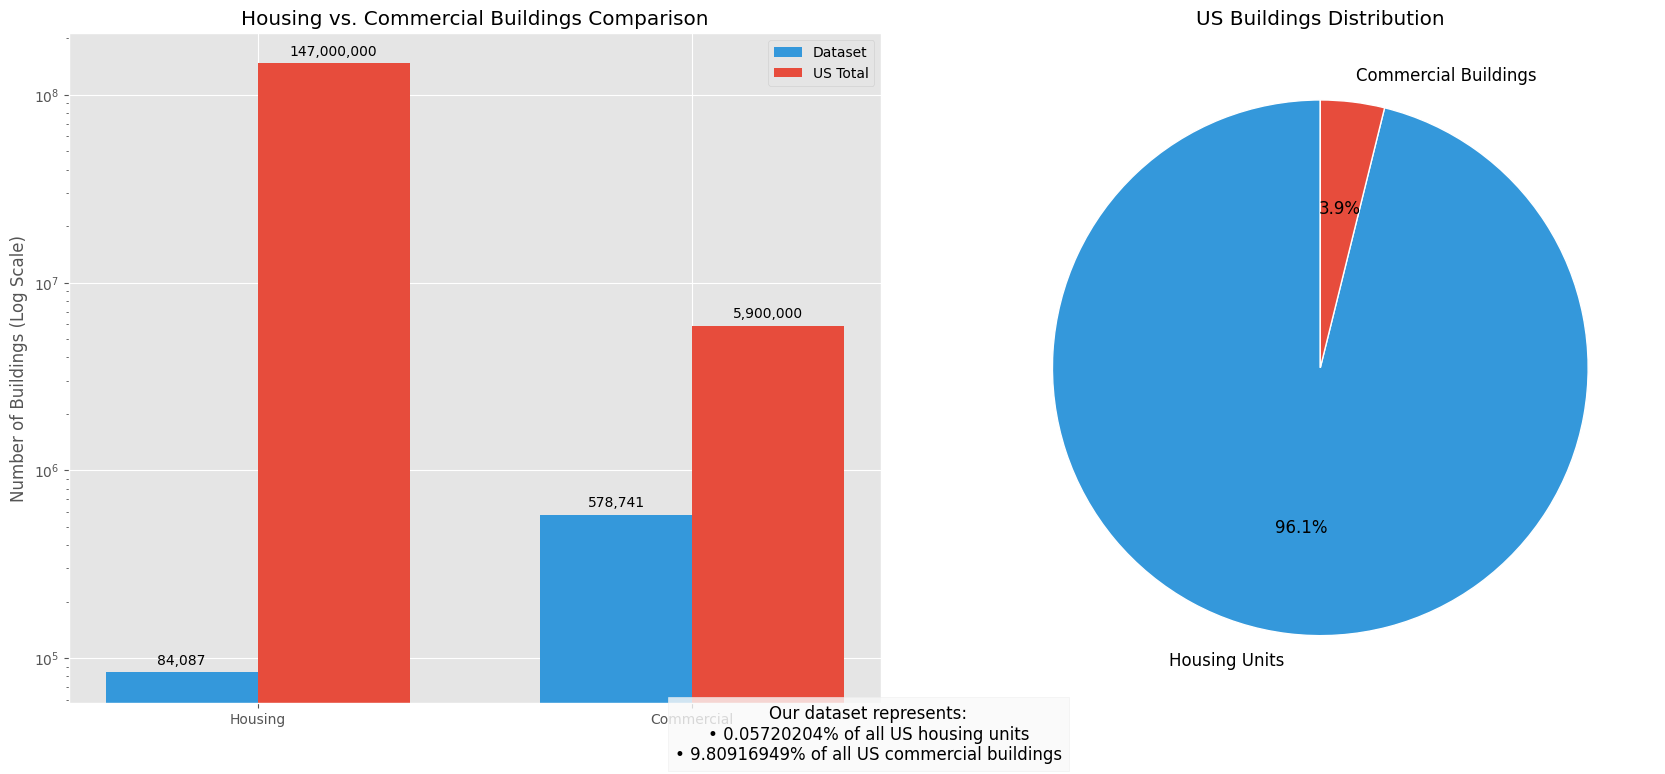

In [31]:
# Create visualizations comparing our dataset to national statistics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Bar chart comparing housing and commercial buildings
# Create the data for the bar chart
categories = ['Housing', 'Commercial']
dataset_counts = [dataset_housing_count, dataset_commercial_count]
us_counts = [us_housing_units, us_commercial_buildings]

# Use log scale for better visibility
x = np.arange(len(categories))
width = 0.35

# Plot bars
ax1.bar(x - width/2, dataset_counts, width, label='Dataset', color='#3498db')
ax1.bar(x + width/2, us_counts, width, label='US Total', color='#e74c3c')

# Add labels and title
ax1.set_yscale('log')
ax1.set_ylabel('Number of Buildings (Log Scale)')
ax1.set_title('Housing vs. Commercial Buildings Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend()

# Add annotations on top of each bar
for i, v in enumerate(dataset_counts):
    ax1.text(i - width/2, v * 1.1, f'{v:,.0f}', ha='center')
    
for i, v in enumerate(us_counts):
    ax1.text(i + width/2, v * 1.1, f'{v:,.0f}', ha='center')

# Pie chart showing the national housing vs. commercial split
labels_us = ['Housing Units', 'Commercial Buildings']
sizes_us = [us_housing_units, us_commercial_buildings]
colors_us = ['#3498db', '#e74c3c']

ax2.pie(sizes_us, labels=labels_us, autopct='%1.1f%%', startangle=90, colors=colors_us,
        wedgeprops={'edgecolor': 'w', 'linewidth': 1}, textprops={'fontsize': 12})
ax2.set_title('US Buildings Distribution')

# Add an annotation with percentages
plt.figtext(0.5, 0.01, 
            f'Our dataset represents:\n'
            f'• {housing_representation_pct:.8f}% of all US housing units\n'
            f'• {commercial_representation_pct:.8f}% of all US commercial buildings', 
            ha='center', fontsize=12, 
            bbox={'facecolor':'#f9f9f9', 'alpha':0.8, 'pad':5})

plt.tight_layout(pad=3)
plt.show()

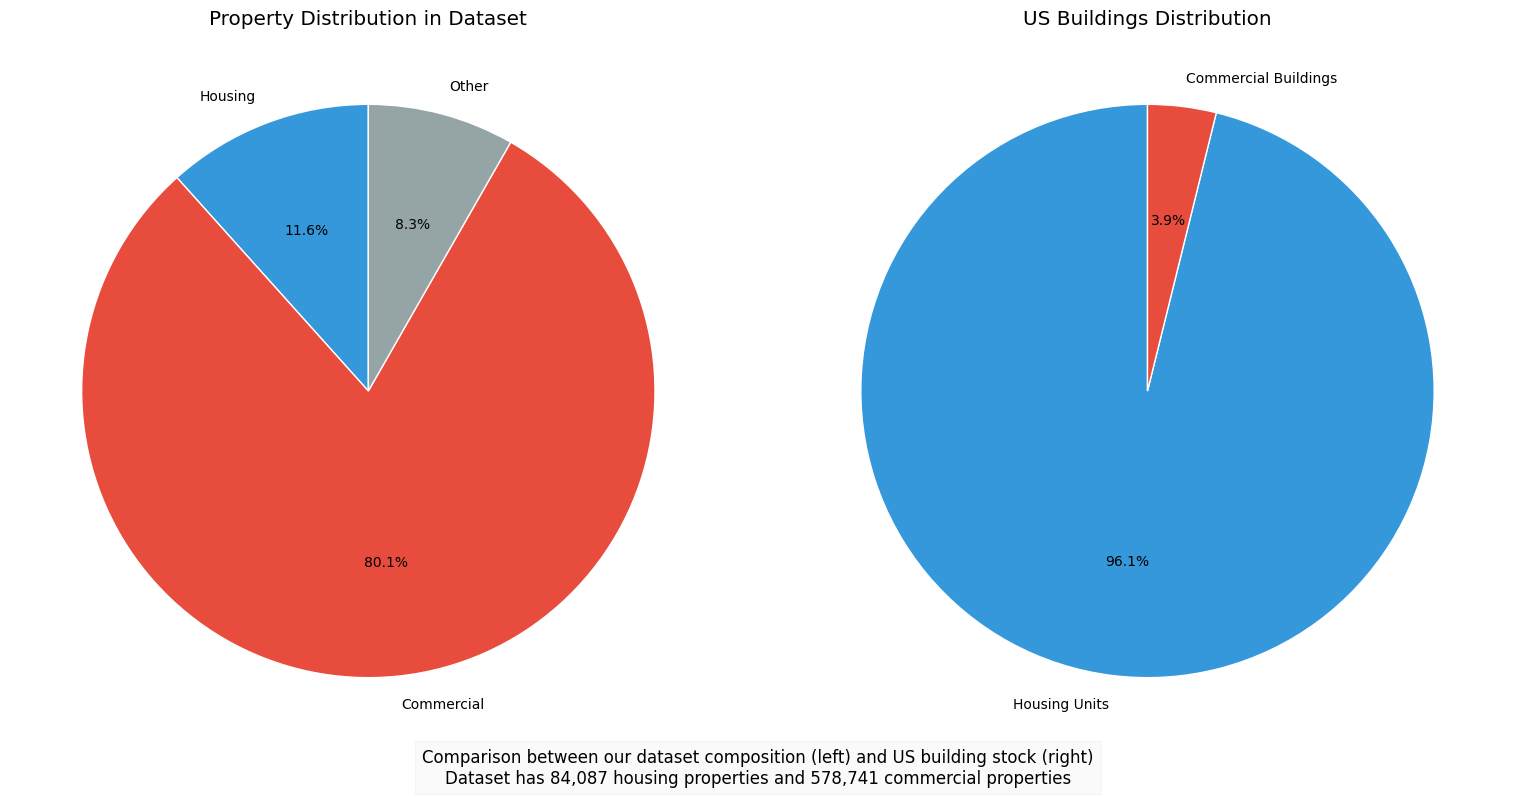

In [32]:
# Create pie charts comparing dataset composition to national composition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Dataset distribution
labels_dataset = ['Housing', 'Commercial', 'Other']
sizes_dataset = [dataset_housing_pct, dataset_commercial_pct, dataset_other_pct]
colors_dataset = ['#3498db', '#e74c3c', '#95a5a6']

ax1.pie(sizes_dataset, labels=labels_dataset, autopct='%1.1f%%', startangle=90, 
        colors=colors_dataset, wedgeprops={'edgecolor': 'w', 'linewidth': 1})
ax1.set_title('Property Distribution in Dataset')

# US distribution
labels_us = ['Housing Units', 'Commercial Buildings']
sizes_us = [us_housing_pct, us_commercial_pct]
colors_us = ['#3498db', '#e74c3c']

ax2.pie(sizes_us, labels=labels_us, autopct='%1.1f%%', startangle=90, 
        colors=colors_us, wedgeprops={'edgecolor': 'w', 'linewidth': 1})
ax2.set_title('US Buildings Distribution')

# Add annotation explaining what we're seeing
plt.figtext(0.5, 0.01, 
            f'Comparison between our dataset composition (left) '
            f'and US building stock (right)\n'
            f'Dataset has {dataset_housing_count:,.0f} housing properties and {dataset_commercial_count:,.0f} commercial properties', 
            ha='center', fontsize=12, 
            bbox={'facecolor':'#f9f9f9', 'alpha':0.8, 'pad':5})

plt.tight_layout(pad=3)
plt.show()